In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import os, shutil

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
ls

drive/  sample_data/


In [0]:
cd drive/My\ Drive

/content/drive/My Drive


In [0]:
ls

'Business Model Canvas.gdoc'  'Leftovers .gdoc'
 CITREP_Data+Code/            'Oral Presentation.gdoc'
 Classroom/                   'Quality Control.gdoc'
'Colab Notebooks'/            'Quality Control Slides.gslides'
'Getting started.pdf'         'Untitled document.gdoc'


In [0]:
cd CITREP_Data+Code/

/content/drive/My Drive/CITREP_Data+Code


In [0]:
ls

 2a-TensorFlow-Data-Loading.ipynb
 2b-TensorFlow-ML.ipynb
 3a-TF-FcNN-MNIST.ipynb
 3b-TF-FcNN-MNIST-Exercise.ipynb
 3c-FcNN-CIFAR10.ipynb
 3d-FcNN-CIFAR10-Exercise.ipynb
 3-diabetic-NeuralNet-Exercise-TF.ipynb
 3e-keras-FCNN-MNIST.ipynb
 3f-keras-FcNN-dogscats.ipynb
 3g-keras-FcNN-bloodcell-Exercise.ipynb
 3h-keras-FC-AutoEncoder.ipynb
 4a-MNIST-CNN-TF.ipynb
 4b-CIFAR10-CNN-TF-Exercise.ipynb
 5a-keras-CNN-dogscats.ipynb
 5b-keras-CNN-Bloodcell.ipynb
 5c-keras-Con-AutoEncoder.ipynb
 5d-keras-Vgg16-dogscats.ipynb
 5e-Resnet50-keras-dogscats-Exercise.ipynb
 6-Semeion-Classification-SimpleCNN-Exercise.ipynb
 7-RNN-IMDB.ipynb
'CITREP+ - Clarence & Dr Sudipta - Deep Learning with Tensorflow and Python - v2.pdf'
 Data/
 dogscats/
 mnist/
 models/
 tensorboard.ipynb


In [0]:
original_dataset_dir = "./dogscats/train/"
base_dir = './dogscats/'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [0]:
os.listdir(base_dir)

['train', 'validation', 'test']

In [0]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [0]:
os.listdir(base_dir)

['train', 'validation', 'test']

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Data Processing

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary') #if there are more than 2 classes change binary to category

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                            batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
### Build a CNN
model = models.Sequential()

# convolution operation with 32 kernals, (3, 3) dimension with relu activation function
#the input shape is 150 by 150 with 3 channels (red, blue, green)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# max pooling with (2, 2) dimension
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#thi operation flattens the entire 3d tensor into a fast input layer in the FCNN (Fully connected neural network)
#we use .dense here because we are building a classification model which requires the network to be fully connected
model.add(layers.Flatten())

#one hidden layer with 512 neurons/nodes
model.add(layers.Dense(512, activation='relu'))

#one output layer with only 1 neuron/node
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

#Param # is the number of unknown parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
                              validation_data=validation_generator, validation_steps=50)


Epoch 1/10
100/100 [==============================] - 461s 5s/step - loss: 0.6868 - acc: 0.5340 - val_loss: 0.6573 - val_acc: 0.6260
Epoch 2/10
100/100 [==============================] - 118s 1s/step - loss: 0.6468 - acc: 0.6210 - val_loss: 0.6365 - val_acc: 0.6220
Epoch 3/10
100/100 [==============================] - 118s 1s/step - loss: 0.5852 - acc: 0.6850 - val_loss: 0.5991 - val_acc: 0.6780
Epoch 4/10
100/100 [==============================] - 118s 1s/step - loss: 0.5658 - acc: 0.7000 - val_loss: 0.5906 - val_acc: 0.6780
Epoch 5/10
100/100 [==============================] - 117s 1s/step - loss: 0.5338 - acc: 0.7310 - val_loss: 0.5903 - val_acc: 0.6830
Epoch 6/10
100/100 [==============================] - 119s 1s/step - loss: 0.5127 - acc: 0.7355 - val_loss: 0.6848 - val_acc: 0.6170
Epoch 7/10
100/100 [==============================] - 120s 1s/step - loss: 0.4939 - acc: 0.7475 - val_loss: 0.5679 - val_acc: 0.6830
Epoch 8/10
100/100 [==============================] - 118s 1s/step -

In [0]:
model.save('cats_and_dogs_small_1.h5')

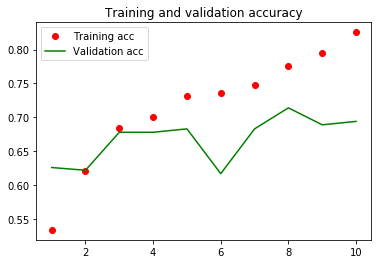

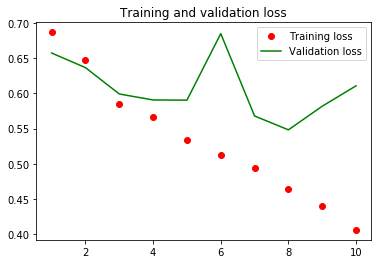

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
## Data Augmentation
#maximum 40 else below 40
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

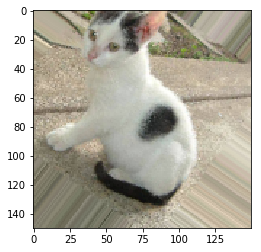

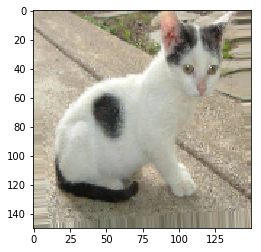

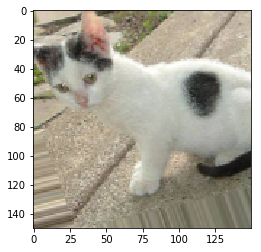

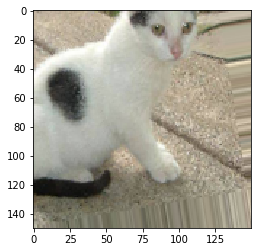

In [0]:
## Display some augmented images
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
## Introduce Dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                width_shift_range=0.2, height_shift_range=0.2,
                                shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=5,
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 201s 2s/step - loss: 0.6917 - acc: 0.5266 - val_loss: 0.6966 - val_acc: 0.4892
Epoch 2/5
100/100 [==============================] - 197s 2s/step - loss: 0.6818 - acc: 0.5522 - val_loss: 0.6525 - val_acc: 0.6031
Epoch 3/5
100/100 [==============================] - 194s 2s/step - loss: 0.6690 - acc: 0.5934 - val_loss: 0.6407 - val_acc: 0.6168
Epoch 4/5
100/100 [==============================] - 193s 2s/step - loss: 0.6575 - acc: 0.5922 - val_loss: 0.6330 - val_acc: 0.6186
Epoch 5/5
100/100 [==============================] - 189s 2s/step - loss: 0.6391 - acc: 0.6256 - val_loss: 0.5911 - val_acc: 0.6815


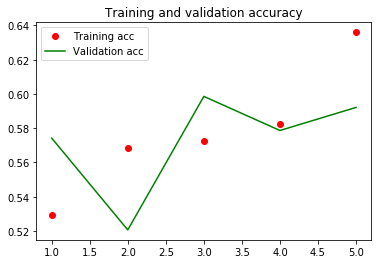

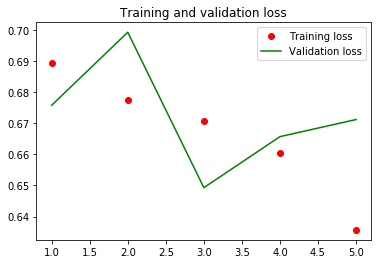

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()